
***
## Positional Argument  
***
##### P = present value of the investment  
##### r = stated interest rate  
##### n = the number of compounding periods  
##### t = the times in year    
  
$\displaystyle F = P\left(1+\frac{r}{n}\right)^{nt}\rightarrow Pe^{rt} \hbox{ as }n\rightarrow \infty$

In [8]:
from math import exp
def Final_Value(P,r,t,n):
    if n == 'inf':
        return P * exp(r*t)
    else:
        return P * ((1 + (r/n))**(n*t))
for t in [4,12,365,'inf']:
    print(f'with period = {t}, Final Value = {Final_Value(12000,0.075,3,t):.2f}')

with period = 4, Final Value = 14996.60
with period = 12, Final Value = 15017.35
with period = 365, Final Value = 15027.53
with period = inf, Final Value = 15027.87


***
## Keyword Arguments + Specify default values
***

In [9]:
def grade(mid,final,base = [0.5,0.5]):
    return mid * base[0] + final * base[1]
print('final score = ',grade(90,30))
print('final score = ',grade(90,30,[0.3,0.7]))
print('final score = ',grade(final = 90,base = [0.4,0.6],mid = 30))
print('final score = ',grade(final = 90,mid = 30))

final score =  60.0
final score =  48.0
final score =  66.0
final score =  60.0


***
## Type hints
***
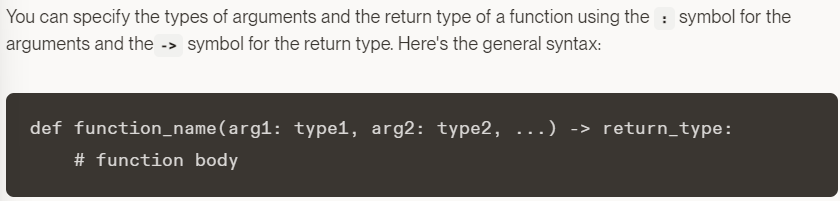

In [10]:
# Complex type hint
def iprod(a: list[int],b : list[int]) -> float:
    '''Inner product function'''
    return sum([i*j for i,j in zip(a,b)])
print(iprod([1,3,4],[1,2,-3]))

-5


***
## Union[str,None] = Optional[str] = str | None
***

In [11]:
def parser(address: str) -> str | None:
    if "@" in address:
        name, area = address.split("@")
        return name
    return None
parser('cy.sc10@nycu.edu.tw')

'cy.sc10'

***
## Using mypy for Static Type Checking
***

***
## *args
***

In [12]:
def print_priority(top1,top2,*args):
    display(f'1st priority : {top1}',
            f'2nd priority : {top2}',
            f'All the rest : {args}')
print_priority('Eat','Sleep','Bath','Study')

'1st priority : Eat'

'2nd priority : Sleep'

"All the rest : ('Bath', 'Study')"

***
## **kwargs
***

In [13]:
def sentence(**args):
    return '{} {} {}'.format(args['subject'],args['verb'],args['object'])
display(sentence(subject = 'You',object = 'me',verb = 'beat'),
        sentence(**{'subject':'You','object':'me','verb':'beat'}))

'You beat me'

'You beat me'

***
## Docstrings
***

In [14]:
def logit_grow(M,r,t):
    '''
    Logistic growth model
    M : maximum capacity
    t : time
    r : growth rate
    '''
    return M / (1 + math.exp(-r*t))

In [15]:
logit_grow?

Signature: logit_grow(M, r, t)
Docstring:
Logistic growth model
M : maximum capacity
t : time
r : growth rate
File:      c:\users\user\appdata\local\temp\ipykernel_19260\1371944785.py
Type:      function

In [16]:
help(logit_grow)

Help on function logit_grow in module __main__:

logit_grow(M, r, t)
    Logistic growth model
    M : maximum capacity
    t : time
    r : growth rate



In [17]:
print(logit_grow.__doc__)


    Logistic growth model
    M : maximum capacity
    t : time
    r : growth rate
    


***
## QM-AM-GM-HM inequalities
***
$\displaystyle 0 < \frac{n}{\frac{1}{x_1} + \cdots + \frac{1}{x_n}} \leq (x_1\cdots x_n)^{1/n} \leq \frac{x_1+\cdots+x_n}{n} \leq \sqrt{\frac{x_1^2\cdots x_n^2}{n}}$  

$\displaystyle \hbox{AM} = \frac{a+b}{2}$  

$\displaystyle \hbox{QM} = \sqrt{\hbox{AM}^2 + (\frac{a-b}{2})^2} = \sqrt{{\frac{a^2+b^2}{2}}}$

$\displaystyle \hbox{GM} = \sqrt{\hbox{AM}^2 - (\frac{a-b}{2})^2} = \sqrt{(\frac{a+b}{2})^2-(\frac{a-b}{2})^2} = \sqrt{ab}$    

$\displaystyle (\frac{a-b}{2})^2 - (\frac{a+b}{2} - \hbox{HM})^2 = ab - \hbox{HM}^2 \Rightarrow \hbox{HM} = \frac{2}{\frac{1}{a}+\frac{1}{b}}$

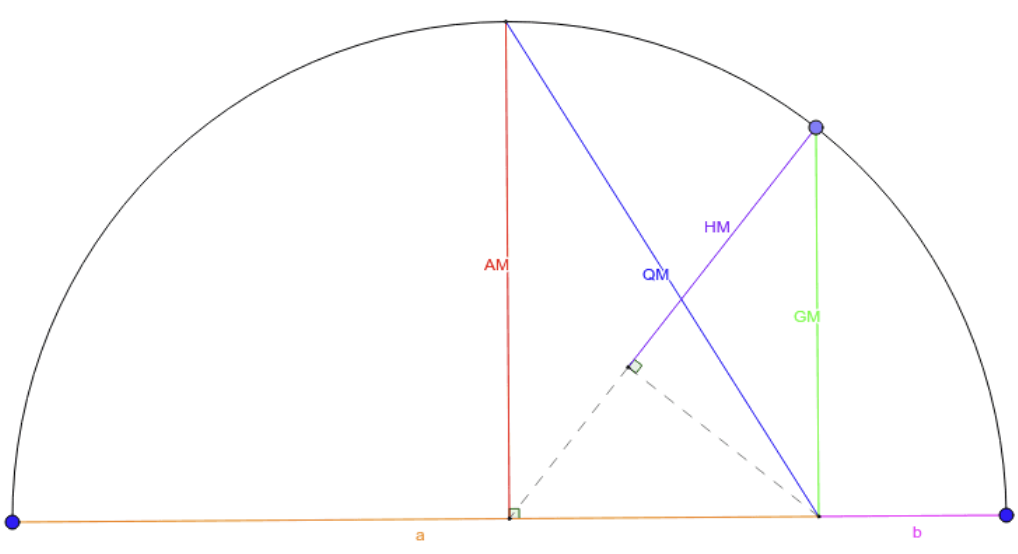
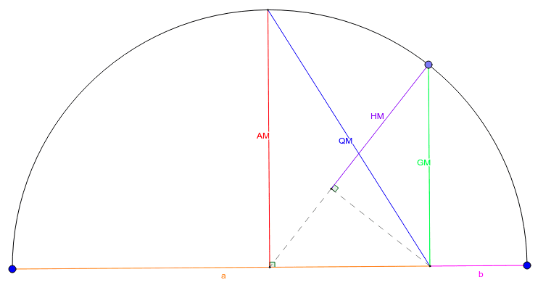
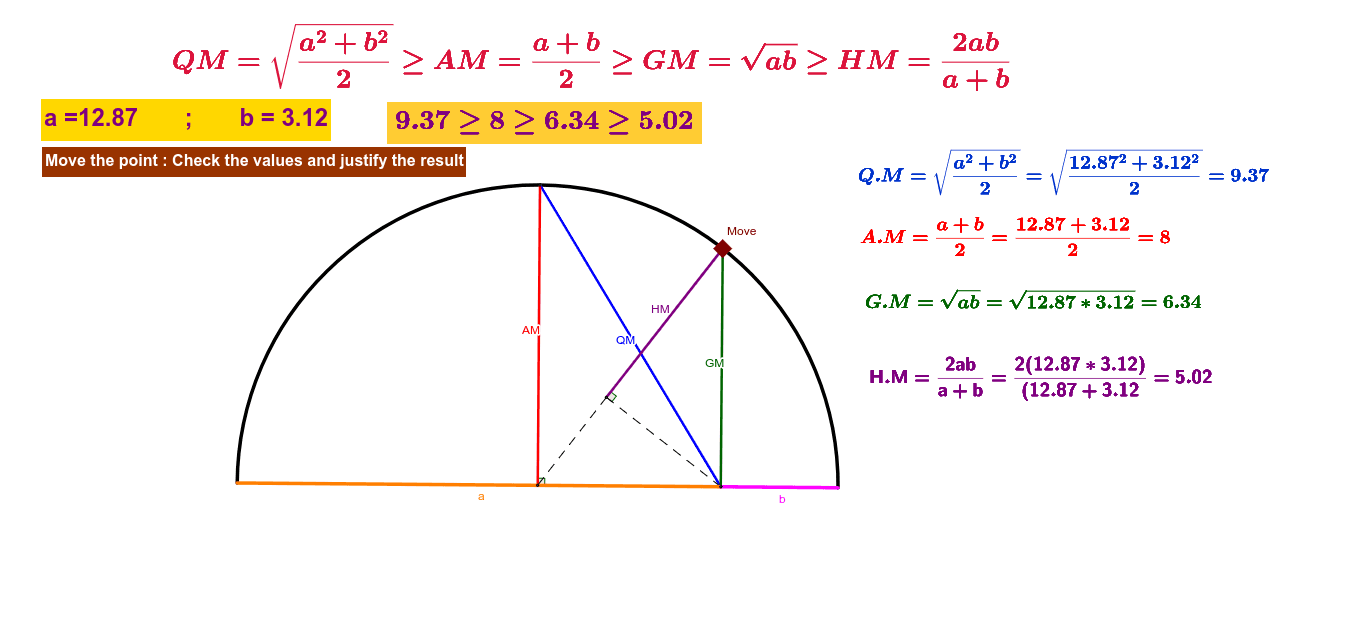

In [18]:
import numpy as np
def QM(*args):
    'Quadratic mean'
    return (sum([k**2 for k in args]) / len(args))**(1/2)

def AM(*args):
    'Arithmatic mean'
    return sum(args) / len(args)

def GM(*args):
    'Geometric mean'
    return np.prod(args)**(1/len(args))

def HM(*args):
    'Harmonic mean'
    return len(args) / sum([1/k for k in args])
     
def vec_op(fn,*args):
    return round(fn(*args),ndigits = 2)

for case in [QM,AM,GM,HM]:
    print(f'{case.__doc__} = ',vec_op(case,12.87,3.12))

Quadratic mean =  9.36
Arithmatic mean =  7.99
Geometric mean =  6.34
Harmonic mean =  5.02


***
## Anonymous Function
***

In [19]:
print('Sum =',vec_op(lambda *args:sum(args),12.87,3.12))

Sum = 15.99


***
## Recurrence Relation
***
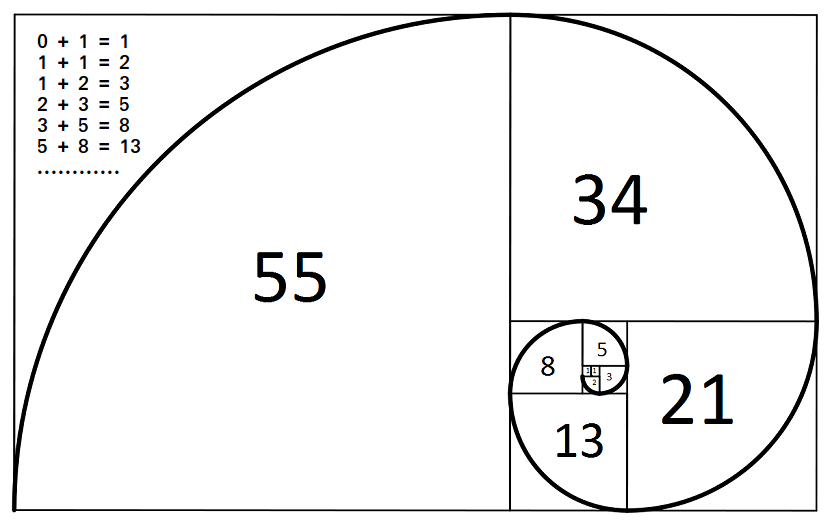  
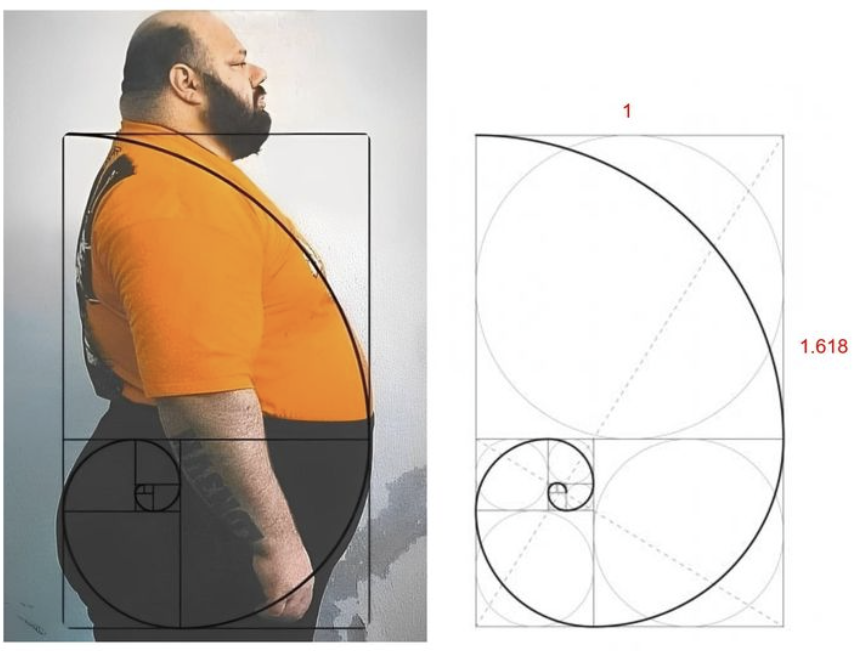

In [20]:
# Python 對於遞迴的次數限制
import sys
sys.getrecursionlimit()

3000

In [21]:
def fibonacci_RR(n):
   if n <= 1:
       return n
   else:
       return(fibonacci_RR(n-1) + fibonacci_RR(n-2))
[fibonacci_RR(k) for k in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

***
## General Solution
***
$\displaystyle f_n = \frac{1}{\sqrt{5}}\left(\frac{1+\sqrt{5}}{2}\right)^n - \frac{1}{\sqrt{5}}\left(\frac{1-\sqrt{5}}{2}\right)^n $

In [22]:
from math import sqrt
def fibonacci_GS(n: int):
    c1 = (1 / sqrt(5))
    a1 = ((1 + sqrt(5)) / 2)**n
    a2 = ((1 - sqrt(5)) / 2)**n
    return int(c1*(a1-a2))
[fibonacci_GS(k) for k in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [23]:
%timeit fibonacci_GS
%timeit fibonacci_RR

10.5 ns ± 0.0999 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
10.7 ns ± 0.0682 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


## More on Recursive
$T_0 = 1, T_1=1,T_2 = 2$

$T_n = 4T_{n-1}+3T_{n-2} -18T_{n-3}$

In [24]:
def Rtest(n):
    if n in [0,1]:
        return 1
    elif n == 2:
        return 2
    else:
        return 4 * Rtest(n-1) + 3 * Rtest(n-2) - 18 * Rtest(n-3)
[Rtest(k) for k in range(10)]

[1, 1, 2, -7, -40, -217, -862, -3379, -12196, -43405]

## General Solution
$\displaystyle T_n = \frac{(12-5n)3^n + 3(-2)^n}{15}$

In [25]:
[int(((12 - 5*n)*(3**n) + 3*((-2)**n)) / 15) for n in range(10)]

[1, 1, 2, -7, -40, -217, -862, -3379, -12196, -43405]

***
## Gold Ratio
***
$\displaystyle \frac{F_{n+1}}{F_n} \rightarrow \frac{1+\sqrt{5}}{2}$

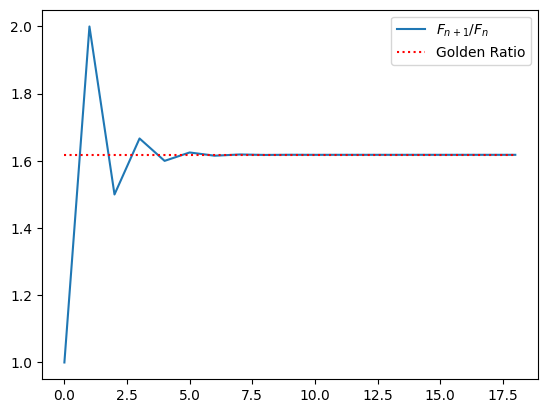

In [26]:
import matplotlib.pyplot as plt
y = [fibonacci_RR(k+1) / fibonacci_RR(k) for k in range(1,20)]
plt.plot(y,label = '$F_{n+1} / F_n$')
plt.hlines(y = (1 + (5)**(1/2))/2,
           xmin = 0,xmax = 18,
           colors = 'red',
           linestyles = 'dotted',
           label = 'Golden Ratio')
plt.legend()

***
## Triangular number 
***
$T(n) = T(n-1) + n$


In [27]:
def tri_seq(n):
    if n == 1:
        return 1
    else:
        return tri_seq(n-1) + n
[tri_seq(k) for k in range(1,6)]

[1, 3, 6, 10, 15]

***
## Binomial coefficient
***

$\displaystyle {n \choose k} = {n-1 \choose k-1} + {n-1 \choose k}$

In [28]:
def pascal_I(n,k):
    if (k == 0) | (n == k):
        return 1
    else:
        return pascal_I(n-1,k-1) + pascal_I(n-1,k)
for n in range(8):
    print([pascal_I(n,i) for i in range(n+1)])

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]


$\displaystyle {n \choose k} = {n \choose k-1}(\frac{n-k+1}{k})$

In [29]:
def pascal_II(n,k):
    if (k == 0) | (n == k):
        return 1
    else:
        return int(pascal_II(n,k-1) * ((n-k+1) / k))
for n in range(8):
    print([pascal_II(n,i) for i in range(n+1)])

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]


In [30]:
%timeit pascal_I
%timeit pascal_II

10.8 ns ± 0.128 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
10.9 ns ± 0.134 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


***
## Global vs Local
***

In [31]:
player = 'Lebron James'
def get_global():
    display(f'inside print_global : {player}')

display(f'at the top level : {player}')
get_global()

'at the top level : Lebron James'

'inside print_global : Lebron James'

In [32]:
def re_get_global():
    print('inside print_global:',player)
    player = 'Luka Doncic'
    print('after change:',player)
try:
    re_get_global()
except Exception as e:
    print(e)

cannot access local variable 'player' where it is not associated with a value


##### What happened here? The first line assigned the string 'Lebron James' to a global variable named player.
##### The to_local() function also has a variable named player, but that’s in its local namespace.

In [33]:
def to_local():
    player = 'Luka Doncic'
    print('inside to_local:',player,id(player))

to_local()
print(player)
id(player)

inside to_local: Luka Doncic 2302552262000
Lebron James


2302551888752

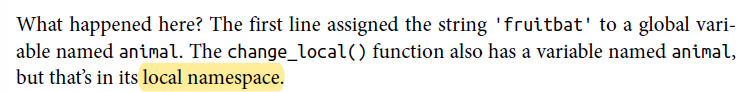  
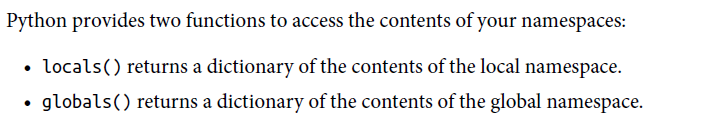

In [34]:
for i,j,k in zip([1,2,3],list('ABC'),[999,101,303]):
    globals()[f'{j}{i}'] = k
print(A1,B2,C3)

999 101 303


In [35]:
{key:val for key,val in globals().items() if key in ['A1','B2','C3']}

{'A1': 999, 'B2': 101, 'C3': 303}

In [36]:
player = 'Lebron James'
def to_local():
    player = 'Luka Doncic'
    print('locals:',locals())
to_local()

locals: {'player': 'Luka Doncic'}


***
# Class
***

In [37]:
class Demo:
    pass
display(dir(Demo),
        Demo.__dict__)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'Demo' objects>,
              '__weakref__': <attribute '__weakref__' of 'Demo' objects>,
              '__doc__': None})

In [38]:
print(Demo)
print(Demo())

<class '__main__.Demo'>


In [39]:
class modula:
    pass
m0 = modula()
m1 = modula()
display(m0,m1)

In [40]:
# Now assign a few attributes to our first object
m0.score = 77
m0.name = 'Cody'
m0.ref = m1
display(m0.score,
        m0.name,
        m0.ref)

77

'Cody'

***
## Initialize
***

In [41]:
class car:
    def __init__(self,brand):
        self.brand = brand
newcar = car('Tesla')
print(newcar.brand)

Tesla


***
## Inherit from parent class
***

In [42]:
class car:
    def slogan(self):
        print('get a car')
# Inheritance
class moto(car):
    pass

get_car = car()
get_moto = moto()
print(issubclass(moto,car))
get_car.slogan()
get_moto.slogan()

True
get a car
get a car


In [43]:
# Override a method
class vehicle(car):
    def slogan(self):
        print('Pefect Match')
get_car = car()
get_vehicle = vehicle()
get_car.slogan()
get_vehicle.slogan()

get a car
Pefect Match


In [44]:
# get some privacy for attributes that you don’t
# want anyone to stomp by accident.
class car:
    def __init__(self,name):
        self.name = name
Lambo = car('Ferruccio Lamborghini')
print(Lambo.name)
Lambo.name = 'Chrysler Corporation'
print(Lambo.name)

Ferruccio Lamborghini
Chrysler Corporation


***
## Getter and Setter
***

In [45]:
class car:
    def __init__(self,name):
        self._brand = name
    def get_brand(self):
        print('inside the getter')
        return self._brand
    def set_brand(self, new_name):
        print('inside the setter')
        self._brand = new_name
g1 = car('Alfa Romeo')
print(g1.get_brand())
g1.set_brand('BMW')
print(g1.get_brand())

inside the getter
Alfa Romeo
inside the setter
inside the getter
BMW


In [46]:
# 利用裝飾器
class car:
    def __init__(self,name):
        self._brand = name
    @property
    def brand(self):
        return self._brand
    def set_brand(self,new_name):
        self._brand = new_name
g2 = car('Dodge')
print(g2.brand)
# 不能直接複寫屬性
try:
    g2.brand = 'Pagani'
except Exception as e:
    print(e)

Dodge
property 'brand' of 'car' object has no setter


In [47]:
# 利用裝飾器
class car:
    def __init__(self,name = None):
        self.brand = name
    @property
    def brand(self):
        print('get brand')
        return self._brand
    @brand.setter
    def brand(self,new_name):
        print('set brand')
        self._brand = new_name
g3 = car('Aston Martin')
print(g3.brand)
g3.brand = 'Mustang'
print(g3.brand) 

set brand
get brand
Aston Martin
set brand
get brand
Mustang


***
## Static method
***

In [48]:
import numpy as np
class Mean_Type:
    @staticmethod
    def QM(*args):
        'Quadratic mean'
        return (sum([k**2 for k in args]) / len(args))**(1/2)
    @staticmethod
    def AM(*args):
        'Arithmatic mean'
        return sum(args) / len(args)
    @staticmethod
    def GM(*args):
        'Geometric mean'
        return np.prod(args)**(1/len(args))
    @staticmethod
    def HM(*args):
        'Harmonic mean'
        return len(args) / sum([1/k for k in args])
def vec_op(fn,*args):
    return round(fn(*args),ndigits = 2)

for case in ['QM','AM','GM','HM']:
    operation = eval(f'Mean_Type.{case}')
    print(f'{operation.__doc__} = ',vec_op(operation,12.87,3.12))

Quadratic mean =  9.36
Arithmatic mean =  7.99
Geometric mean =  6.34
Harmonic mean =  5.02


***
## Class Method
***

In [49]:
# A that counts how many object instances have been made from it:
class iCounter:
    count = 0
    def __init__(self):
        iCounter.count += 1
    @classmethod
    def kids(cls):
        print("iCounter create",cls.count,"little objects.")
easy = iCounter()
medium = iCounter()
hard = iCounter()
iCounter.kids()

iCounter create 3 little objects.
